In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# performing eda

In [4]:
profile=ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature importance graph

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_)

[0.07610435 0.05482654 0.12576381 0.06129451 0.06099597 0.01873067
 0.03748976 0.08345738 0.10691759 0.08053394 0.07083801 0.12332361
 0.09972387]


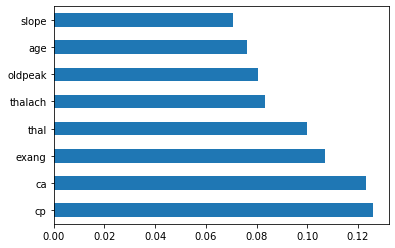

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# feature selection

In [16]:
#old peak and slope are highly correlated so remove old peak(lesser feature improtance)

In [17]:
df2=df.copy()
df2.drop('slope',axis=1,inplace=True)

# Train test split

In [67]:
X1=df2.drop('target',axis=1)
y1=df2['target']

In [68]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3)

## other techniques of dimensionality reduction

In [24]:
# 1.percent of missing values (remove when missing values are high)
# 2.amount of variation  (if variance is low then remove that feature)
# 3.pairwise correlation  (if 2 are highly correlated then remove one)
# 4.multicolinearity  
# 5. PCA
# 6. cluster analysis
# 7. correlation with target (remove the one with low correlation with target)

# 8. forward selection 
# 9. Backward elimination
# 10 stepwise selection

# 11. LASSO
# 12. Tree-based selection

# model selection                                         

In [25]:
#1.logistic regression(linear
# 2.decision tree (non linenear)
# 3.ensemble models("")

# 4.knn("")
# 5. navie byes
# 6.support vector machine


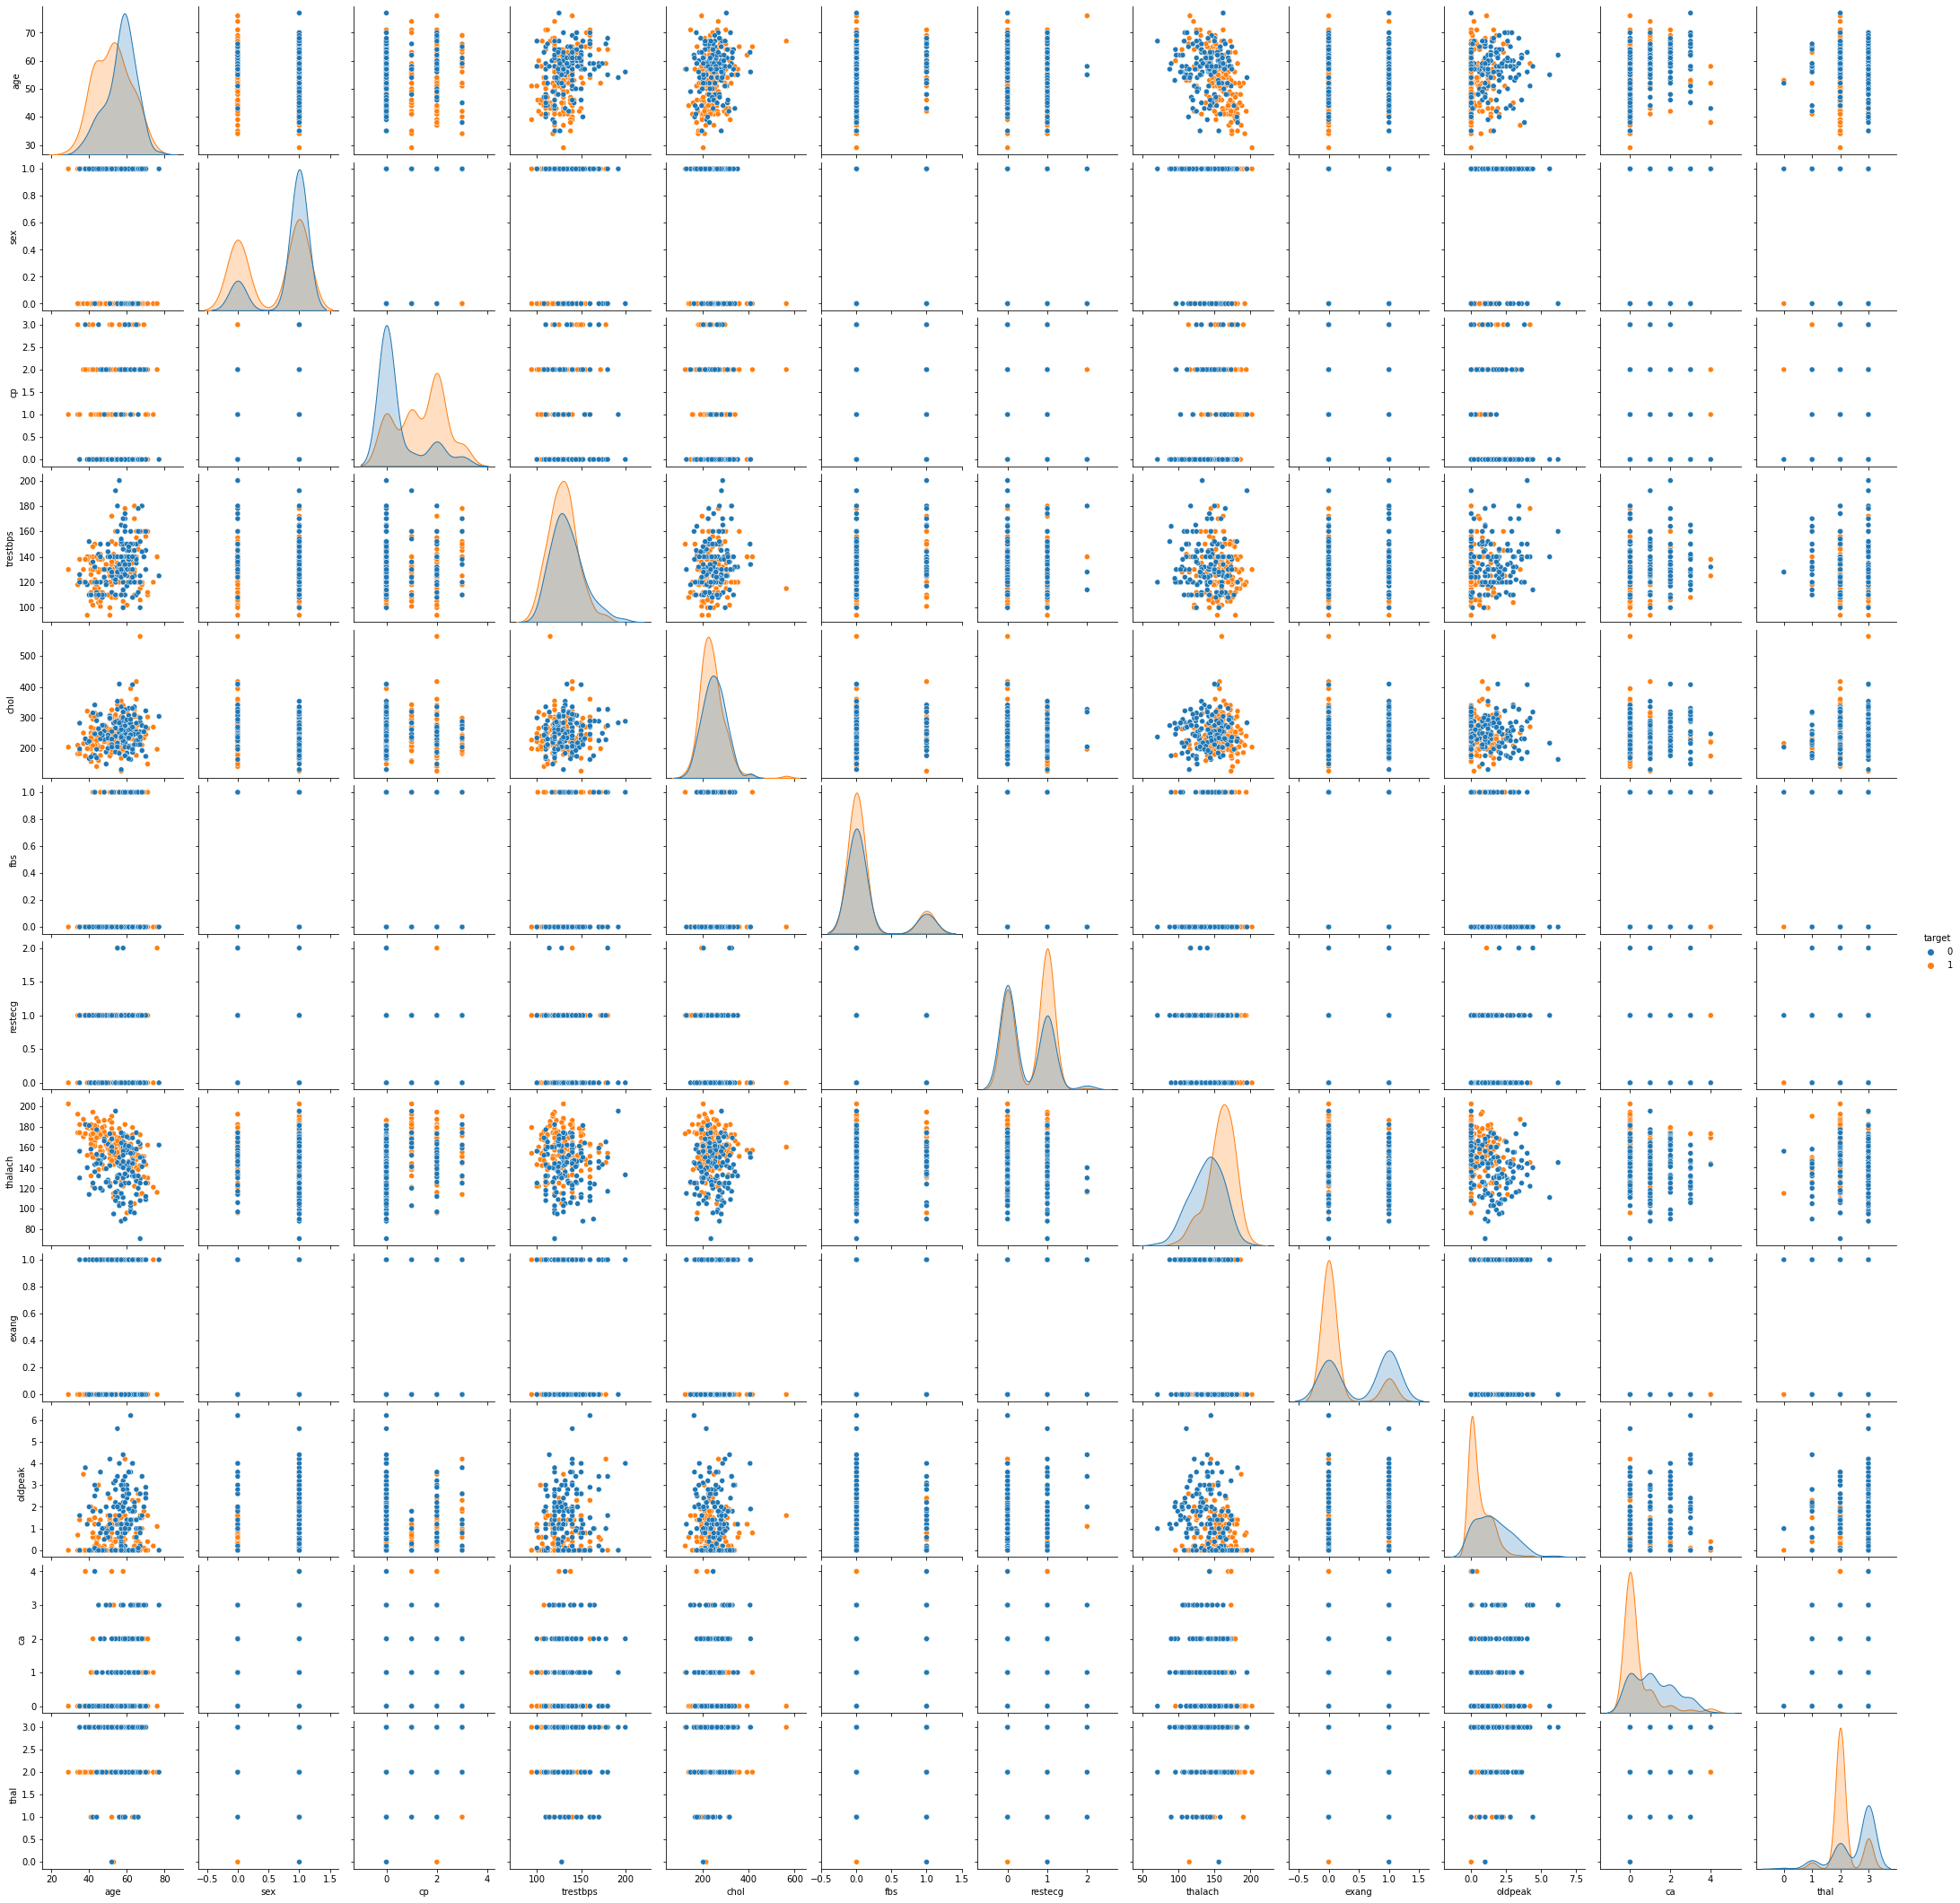

In [26]:
import seaborn as sns
sns.pairplot(df2,hue='target')

### since it is a non linear classification and the datapoints are completely overlapping we can use knn

## feature scaling

In [296]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.transform(X1_test)

## knn

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [85]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=10)

In [86]:
knn.score(X1_test, y1_test)

0.8461538461538461

Maximum accuracy:- 0.8461538461538461 at K = 9


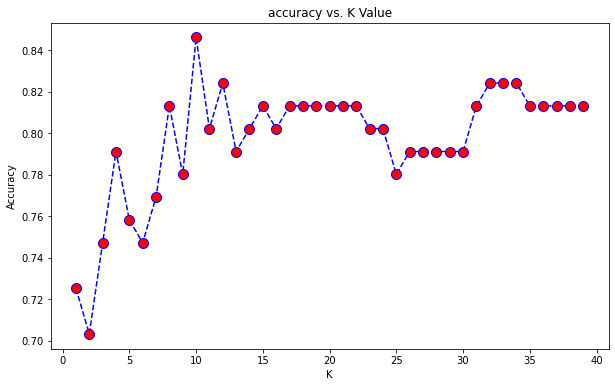

In [87]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X1_train,y1_train)
    yhat = neigh.predict(X1_test)
    acc.append(metrics.accuracy_score(y1_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# knn gives 84 percent accuracy after hyperparameter tuning.

## Decision trees

In [251]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [252]:
X2=df2.drop('target',axis=1)
y2=df2['target']

In [253]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=42)

In [254]:
model.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [255]:
model.score(X2_test,y2_test)

0.7582417582417582

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [281]:
para={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [282]:
grid=GridSearchCV(model, param_grid=para , cv=10 , verbose=1 , n_jobs=-1)

In [283]:
grid.fit(X2_train,y2_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68398268 0.67922078 0.67922078 0.68398268 0.67922078
 0.67922078 0.68398268 0.67922078        nan 0.67922078 0.67922078
 0.67922078 0.68398268 0.67922078 0.67922078 0.68398268 0.68398268
        nan 0.68398268 0.68398268 0.67922078 0.68398268 0.67922078
 0.68398268 0.68398268 0.67922078        nan 0.67922078 0.68398268
 0.68398268 0.67922078 0.67922078 0.68398268 0.68398268 0.67922078
        nan 0.69805195 0.69805195 0.69805195 0.69329004 0.69805195
 0.69805195 0.69329004 0.69329004        nan 0.69329004 0.69329004
 0.69329004 0.69329004 0.69805195 0.69329004 0.69329004 0.69805195
        nan 0.69805195 0.69805195 0.69805195 0.69329004 0.69329004
 0.69805195 0.69805195 0.69805195        nan 0.69329004 0.69329004
 0.69805195 0.69329004 0.69329004 0.69805195 0.69329004 0.69805195
        nan 0.76363636 0.75887446 0.76341991 0.7636363

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [284]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [285]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

In [286]:
grid.best_score_

0.8015151515151515

In [292]:
modelgs=DecisionTreeClassifier(criterion='gini', max_depth=5 , min_samples_leaf=3 , min_samples_split=4)
modelgs.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

In [293]:
modelgs.score(X2_test,y2_test)

0.8131868131868132

### confustion matrix

In [269]:
y2_predicted=modelgs.predict(X2_test)

In [270]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y2_predicted)
cm2

array([[34,  7],
       [10, 40]], dtype=int64)

Text(69.0, 0.5, 'Truth')

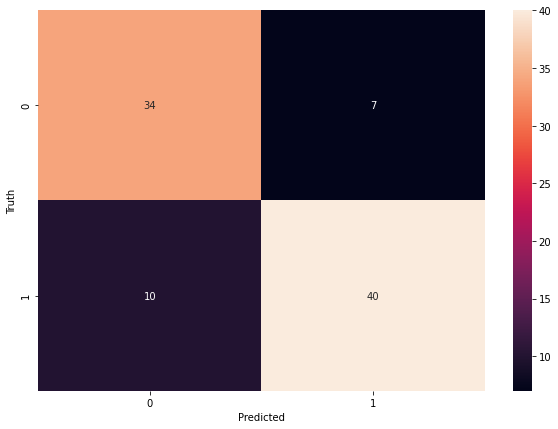

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision trees gives 81% accuracy after using gridsearchCV

## aiming for better using random forest

In [192]:
X3=df2.drop('target',axis=1)
y3=df['target']

In [194]:
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,random_state=42)

In [200]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X3_train=sc.fit_transform(X3_train)
X3_test=sc.transform(X3_test)

In [219]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=20)
model3.fit(X3_train, y3_train)

RandomForestClassifier(n_estimators=20)

In [220]:
model3.score(X3_test,y3_test)

0.8021978021978022

## hyperparameter tuning using grid search cv

In [207]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [221]:
CV_rfc = GridSearchCV(estimator=model3, param_grid=param_grid, cv= 5)
CV_rfc.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [223]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [229]:
model3gs=RandomForestClassifier(criterion= 'entropy',max_depth= 5, max_features= 'auto', n_estimators= 500,random_state=42)

In [230]:
model3gs.fit(X3_train,y3_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=42)

In [231]:
model3gs.score(X3_test,y3_test)

0.8351648351648352

## Using cross val score to get the average score for random forest

In [232]:
from sklearn.model_selection import cross_val_score

In [237]:
scores1 = cross_val_score(model3gs,X3,y3, cv=10)
np.average(scores1)

0.8216129032258065

In [243]:
y3_predicted=model3gs.predict(X3_test)

In [244]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_predicted)
cm3

array([[32,  9],
       [ 6, 44]], dtype=int64)

Text(69.0, 0.5, 'Truth')

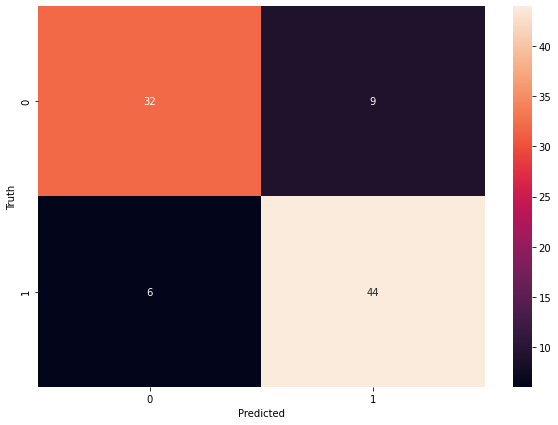

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm3, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Truth')